### Iris Flower Prediction with Deployment - 

In [63]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings 
warnings.filterwarnings('ignore') 

from sklearn.datasets import load_iris

In [64]:
iris = load_iris() 
X = iris.data  
y = iris.target 

data = pd.DataFrame(X,columns=iris.feature_names) 
data["Species"] = y 

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
data.shape

(150, 5)

### We will use the method of Dimentionality Reduction to reduce the number of features

## PCA Implementation

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 'mle',svd_solver = 'full')
pca.fit(X)

PCA(n_components='mle', svd_solver='full')

In [68]:
X_pca = pca.transform(X)

In [69]:
X.shape

(150, 4)

In [70]:
X_pca.shape 

(150, 3)

### The number of columns got reduced to 3. We will further take a look how PCA will impact the metrics

### First let's explore our data

In [88]:
data["Species"].unique()

array([0, 1, 2])

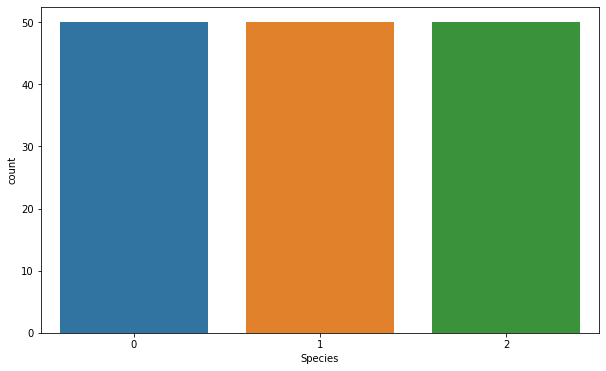

In [89]:
plt.figure(figsize = (10,6))
sns.countplot(data["Species"])
plt.show()

In [90]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

<Figure size 720x432 with 0 Axes>

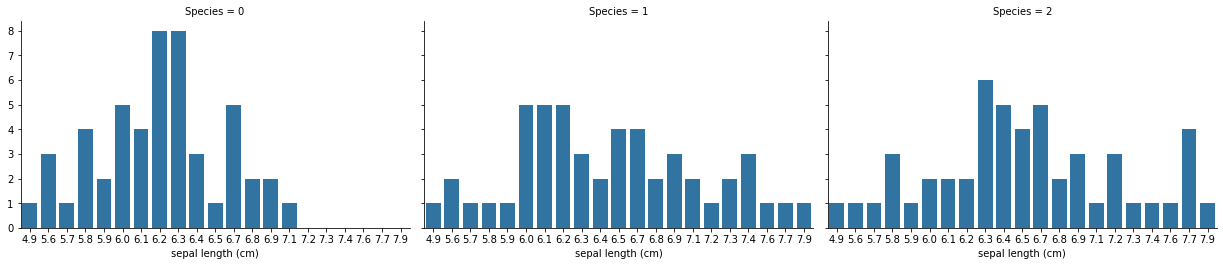

In [91]:
plt.figure(figsize = (10,6))
grid = sns.FacetGrid(data, col='Species', size=3.8, aspect=1.5) 
grid.map(sns.countplot, 'sepal length (cm)')
plt.show()

<Figure size 720x432 with 0 Axes>

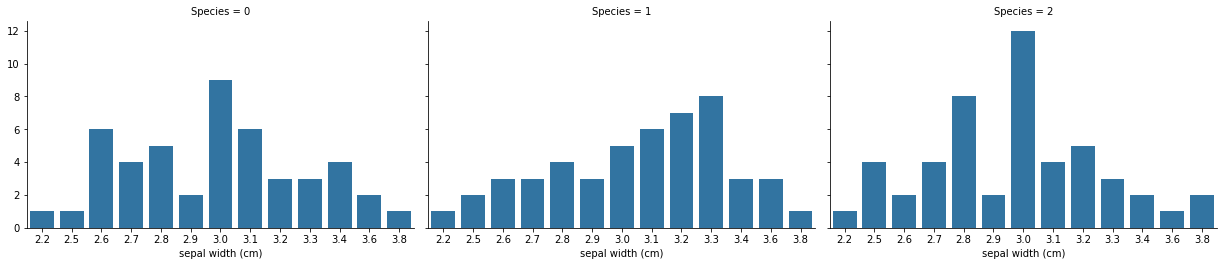

In [92]:
plt.figure(figsize = (10,6))
grid = sns.FacetGrid(data, col='Species', size=3.8, aspect=1.5) 
grid.map(sns.countplot, 'sepal width (cm)')
plt.show()

<Figure size 720x432 with 0 Axes>

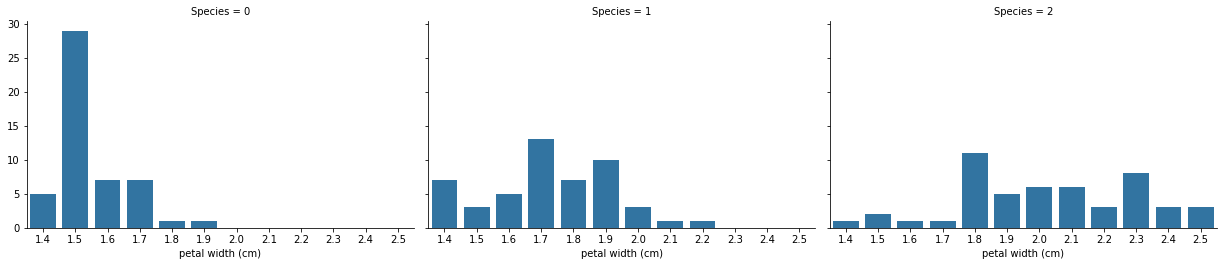

In [76]:
plt.figure(figsize = (10,6))
grid = sns.FacetGrid(data, col='Species', size=3.8, aspect=1.5) 
grid.map(sns.countplot, 'petal width (cm)')
plt.show()

<Figure size 720x432 with 0 Axes>

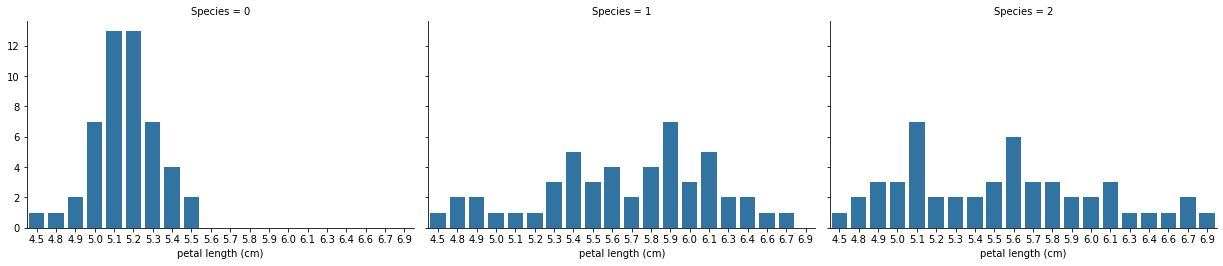

In [77]:
plt.figure(figsize = (10,6))
grid = sns.FacetGrid(data, col='Species', size=3.8, aspect=1.5) 
grid.map(sns.countplot, 'petal length (cm)')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size = 0.1)

In [102]:
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(135, 3)
(135,)
(15, 3)
(15,)


### Hyperparameter tuning without PCA

### We will use X instead of X_pca here to compare the results

In [107]:
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.1)

In [108]:
print(X_train1.shape) 
print(y_train1.shape) 
print(X_test1.shape) 
print(y_test1.shape)

(135, 4)
(135,)
(15, 4)
(15,)


### Without using PCA we have all 4 columns

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [110]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average = 'macro')  
    rec = recall_score(y_true, y_pred,average = 'macro') 
    accuracy = accuracy_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred,average = 'macro')
    
    if retur:
        return pre, rec, accuracy,f1score
    else: 
        print('Precision: ',pre) 
        print('Recall: ',rec) 
        print('Accuracy: ',accuracy)
        print('F1_Score: ',f1score)

In [111]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X_train1,y_train1)
        loss(y_test1, model.predict(X_test1)) 
        print('-' * 30)

In [112]:
train_and_eval(models, X_train1, y_train1)

Logistic_Regression :
Precision:  0.9333333333333332
Recall:  0.9444444444444445
Accuracy:  0.9333333333333333
F1_Score:  0.9326599326599326
------------------------------
SVC :
Precision:  0.9333333333333332
Recall:  0.9444444444444445
Accuracy:  0.9333333333333333
F1_Score:  0.9326599326599326
------------------------------
DecisionTreeClassifier :
Precision:  0.4666666666666666
Recall:  0.6666666666666666
Accuracy:  0.6
F1_Score:  0.5238095238095238
------------------------------
GradientBoostingClassifier :
Precision:  0.8888888888888888
Recall:  0.8888888888888888
Accuracy:  0.8666666666666667
F1_Score:  0.8666666666666667
------------------------------


### Now let's try to implement with PCA. We will use X_pca instead of X. Let's check if we get any improvements in our results

### Hyperparameter tuning with PCA

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [104]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average = 'macro')  
    rec = recall_score(y_true, y_pred,average = 'macro') 
    accuracy = accuracy_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred,average = 'macro')
    
    if retur:
        return pre, rec, accuracy,f1score
    else: 
        print('Precision: ',pre) 
        print('Recall: ',rec) 
        print('Accuracy: ',accuracy)
        print('F1_Score: ',f1score)

In [105]:
def train_and_eval(models, X_pca,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X_train,y_train)
        loss(y_test, model.predict(X_test)) 
        print('-' * 30)

In [106]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1_Score:  1.0
------------------------------
SVC :
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1_Score:  1.0
------------------------------
DecisionTreeClassifier :
Precision:  0.48148148148148145
Recall:  0.6666666666666666
Accuracy:  0.6666666666666666
F1_Score:  0.5384615384615384
------------------------------
GradientBoostingClassifier :
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1_Score:  1.0
------------------------------


### Great! We can see that now we have perfect accuracy for Logistic Regression and Support Vector Classifier Models.

### I will be implementing SVC in this case.

In [87]:
Svc = SVC(kernel='rbf', gamma=0.5, probability=True)
Svc.fit(X_train, y_train)

SVC(gamma=0.5, probability=True)

In [ ]:
import os
import pickle
os.chdir(r'C:\Users\7XIN\Desktop\Iris Prediction with deployment')
print(os.getcwd())

In [30]:
pickle.dump(gra, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))